# bag of words (kelime çantası modeli)

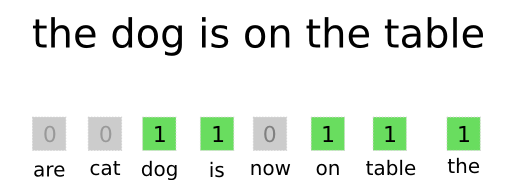

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
emails = [
    'Merhaba, bu bir örnek e-postadır. Umarım iyisindir.',
    'Eğitimle ilgili daha fazla bilgi almak istiyorsan bize ulaş!',
    'Örnek e-posta örnek bir konu hakkında.',
    'Bugün öğle yemeğine gidelim mi?'
]

In [7]:
#CountVectorizer oluşturma
vectorizer = CountVectorizer()

In [8]:
# Metin verilerini kullanarak kelime dağarcığı oluşturma ve belge temsili yapma
X = vectorizer.fit_transform(emails)

In [9]:
# Kelime dağarcığını gösterme
print("\nKelime Dağarcığı:")
print(vectorizer.get_feature_names_out())


Kelime Dağarcığı:
['almak' 'bilgi' 'bir' 'bize' 'bu' 'bugün' 'daha' 'eğitimle' 'fazla'
 'gidelim' 'hakkında' 'ilgili' 'istiyorsan' 'iyisindir' 'konu' 'merhaba'
 'mi' 'posta' 'postadır' 'ulaş' 'umarım' 'yemeğine' 'örnek' 'öğle']


In [10]:
# Elde edilen sayı matrisini gösterme
print("Sayı Matrisi:")
print(X.toarray())

Sayı Matrisi:
[[0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0]
 [1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 2 0]
 [0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1]]


# --BOW kullanarak spam tespiti yapma

In [11]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# ham ve spam kaç kez tekrar etmiş onu gösterir.
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [17]:
#DataFrame'inin boyutunu (satır ve sütun sayısını) döndürür
df.shape

(5572, 2)

In [18]:
def get_spam_number(x):
    if x=='spam':
        return 1
    return 0

In [19]:
#category sutununa bakarak yeni bir sutun oluşturacak spam adında
df['spam'] = df['Category'].apply(get_spam_number)

In [20]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [21]:
df.shape

(5572, 3)

In [22]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.2)

In [34]:
X_train.shape

(4457,)

In [35]:
X_test.shape

(1115,)

In [36]:
#pandas dizisi
type(X_train)

pandas.core.series.Series

In [37]:
X_train[:7]

2250    Thanks for your ringtone order, ref number R83...
1331                          Aight no rush, I'll ask jay
1003    Yes..he is really great..bhaji told kallis bes...
3919    No need to ke qi... Ü too bored izzit y sudden...
3340    Babe !!!! I LOVE YOU !!!! *covers your face in...
415     100 dating service cal;l 09064012103 box334sk38ch
1180                  To day class is there are no class.
Name: Message, dtype: object

In [38]:
type(y_train)

pandas.core.series.Series

In [39]:
y_train[:7]

2250    1
1331    0
1003    0
3919    0
3340    0
415     1
1180    0
Name: spam, dtype: int64

In [40]:
X_train.values

array(['Thanks for your ringtone order, ref number R836. Your mobile will be charged £4.50. Should your tone not arrive please call customer services on 09065069154',
       "Aight no rush, I'll ask jay",
       'Yes..he is really great..bhaji told kallis best cricketer after sachin in world:).very tough to get out.',
       ...,
       'You are now unsubscribed all services. Get tons of sexy babes or hunks straight to your phone! go to http://gotbabes.co.uk. No subscriptions.',
       'Do you want a new Video phone? 600 anytime any network mins 400 Inclusive Video calls AND downloads 5 per week Free delTOMORROW call 08002888812 or reply NOW',
       'Ok ok take care. I can understand.'], dtype=object)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

v=CountVectorizer()
# X_train veri kümesini CountVectorizer kullanarak vektörlere dönüştürme
X_train_cv = v.fit_transform(X_train.values)

X_train_cv

<4457x7770 sparse matrix of type '<class 'numpy.int64'>'
	with 59113 stored elements in Compressed Sparse Row format>

In [42]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
X_train_cv.toarray()[:2][0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
X_train_cv.shape

(4457, 7770)

In [45]:
print("\nKelime Dağarcığı:")
print(v.get_feature_names_out())


Kelime Dağarcığı:
['00' '000' '008704050406' ... 'èn' 'ú1' '〨ud']


In [51]:
print("\nKelime Dağarcığı 1000-1050 arası:")
print(v.get_feature_names_out()[1000:1050])


Kelime Dağarcığı 1000-1050 arası:
['apeshit' 'apnt' 'apo' 'apologise' 'apology' 'app' 'apparently' 'appeal'
 'appear' 'appendix' 'applausestore' 'applebees' 'apples' 'application'
 'apply' 'applyed' 'applying' 'appointment' 'appointments' 'appreciate'
 'appreciated' 'approaches' 'appropriate' 'approx' 'apps' 'appt' 'appy'
 'april' 'apt' 'ar' 'arabian' 'arcade' 'archive' 'ard' 'are' 'area' 'aren'
 'arent' 'aretaking' 'areyouunique' 'argentina' 'argh' 'argue' 'arguing'
 'argument' 'arguments' 'aries' 'arise' 'arises' 'arithmetic']


In [52]:
v.get_feature_names_out().shape

(7770,)

In [54]:
#v değişkeninde desteklenen tüm yöntemleri gösterecek
dir(v)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_ngram_range',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',

In [55]:
v.vocabulary_

{'thanks': 6812,
 'for': 2946,
 'your': 7732,
 'ringtone': 5798,
 'order': 4994,
 'ref': 5663,
 'number': 4873,
 'r836': 5555,
 'mobile': 4556,
 'will': 7539,
 'be': 1259,
 'charged': 1727,
 '50': 525,
 'should': 6136,
 'tone': 6968,
 'not': 4844,
 'arrive': 1061,
 'please': 5263,
 'call': 1604,
 'customer': 2132,
 'services': 6046,
 'on': 4946,
 '09065069154': 214,
 'aight': 871,
 'no': 4809,
 'rush': 5868,
 'll': 4181,
 'ask': 1079,
 'jay': 3817,
 'yes': 7713,
 'he': 3381,
 'is': 3766,
 'really': 5621,
 'great': 3249,
 'bhaji': 1332,
 'told': 6956,
 'kallis': 3909,
 'best': 1318,
 'cricketer': 2080,
 'after': 846,
 'sachin': 5879,
 'in': 3661,
 'world': 7619,
 'very': 7289,
 'tough': 7006,
 'to': 6939,
 'get': 3128,
 'out': 5022,
 'need': 4742,
 'ke': 3925,
 'qi': 5533,
 'too': 6980,
 'bored': 1433,
 'izzit': 3793,
 'suddenly': 6588,
 'thk': 6861,
 'of': 4907,
 'this': 6860,
 'babe': 1172,
 'love': 4248,
 'you': 7728,
 'covers': 2047,
 'face': 2745,
 'kisses': 3971,
 '100': 251,
 'da

In [56]:
v.get_feature_names_out()[6812]

'thanks'

In [62]:
X_train_np = X_train_cv.toarray()

X_train_np[:6]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [63]:
X_train_np[:4][0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
#hangi indexlerin bir olduğunu anlamak için baktık
np.where(X_train_np[0]!=0)

(array([ 214,  525, 1061, 1259, 1604, 1727, 2132, 2946, 4556, 4844, 4873,
        4946, 4994, 5263, 5555, 5663, 5798, 6046, 6136, 6812, 6968, 7539,
        7732], dtype=int64),)

In [65]:
X_train

2250    Thanks for your ringtone order, ref number R83...
1331                          Aight no rush, I'll ask jay
1003    Yes..he is really great..bhaji told kallis bes...
3919    No need to ke qi... Ü too bored izzit y sudden...
3340    Babe !!!! I LOVE YOU !!!! *covers your face in...
                              ...                        
1248    Horrible gal. Me in sch doing some stuff. How ...
3277    Lol your right. What diet? Everyday I cheat an...
3059    You are now unsubscribed all services. Get ton...
3420    Do you want a new Video phone? 600 anytime any...
4051                   Ok ok take care. I can understand.
Name: Message, Length: 4457, dtype: object

In [66]:
#ilk mail 2250 onu görmek için
X_train[2250]

'Thanks for your ringtone order, ref number R836. Your mobile will be charged £4.50. Should your tone not arrive please call customer services on 09065069154'

In [67]:
#214 1 olduğu için mailde varmı diye baktık
v.get_feature_names_out()[214]

'09065069154'

In [68]:
v.get_feature_names_out()[5555]

'r836'

In [82]:
#vektörün tüm değerlerini görmek için yazılmış kod parçası
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [83]:
X_train_np[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Multinomial Naive Bayes sınıflandırma modelini eğitmek üzere Scikit-Learn kütüphanesindeki MultinomialNB sınıfını kullanmaktadır.

In [101]:
from sklearn.naive_bayes import MultinomialNB
# Multinomial Naive Bayes sınıflandırma modelini oluşturma
model=MultinomialNB()

# Eğitim verilerini ve etiketleri kullanarak modeli eğitme
model.fit(X_train_cv, y_train)

MultinomialNB()

 Eğitim süreci boyunca, model sınıflandırma algoritmasını öğrenir ve daha sonra yeni, görülmemiş metin verilerini sınıflandırmak için kullanılabilir.

In [70]:
X_test_cv = v.transform(X_test)

In [72]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       964
           1       0.97      0.92      0.95       151

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [76]:
email= [
    'This is the 2nd time we have tried 2 contact u. U have won the Â£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.',
    'Rofl. Its true to its name',
    'Merhaba, bu bir örnek e-postadır. Umarım iyisindir.',
    '%50 indirimli ürünler sizi bekliyor.'
]

email_count = v.transform(email)
model.predict(email_count)

array([1, 0, 0, 1], dtype=int64)

In [99]:
from sklearn.pipeline import Pipeline

# CountVectorizer ve MultinomialNB'yi birleştiren bir Pipeline oluşturma
clf=Pipeline([
    ('vectorizer',CountVectorizer()), # Metin verilerini vektörlere dönüştürme adımı
    ('nb', MultinomialNB())  # Multinomial Naive Bayes sınıflandırma adımı
])

In [100]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [81]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       964
           1       0.97      0.92      0.95       151

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
from keras import models
from keras import layers

network = models.Sequential() #bir seri model oluşturulur.
network.add(layers.Dense(12, activation='relu', input_shape=(7768,)))
#lk katman (gizli katman) eklenir. Bu katman, 12 nörona sahiptir, 
#ReLU aktivasyon fonksiyonu kullanır ve giriş şekli 7768'dir.
network.add(layers.Dense(1, activation='sigmoid'))
#ikinci katman (çıkış katmanı) eklenir. Bu katman, tek bir nörona sahiptir 
#ve sigmoid aktivasyon fonksiyonunu kullanır.
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
network.fit(X_train_np, y_train, epochs=30, batch_size=10)